<a target="_blank" href="https://colab.research.google.com/github/jvictorferreira3301/PDS/blob/main/audio_Tarefa_3.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
<a href='https://github.com/jvictorferreira3301/PDS' target="_blank"><img alt='GitHub' src='https://img.shields.io/badge/Open_in Github-100000?style=plastic&logo=GitHub&logoColor=white&labelColor=black&color=black'/></a>
</a>

EC01045 - PROCESSAMENTO DIGITAL DE SINAIS (2024 .4 - T01)

Faculdade de Engenharia da Computação e Telecomunicações - Universidade Federal do Pará

Professor: Ronaldo de Freitas Zampolo 

Aluno: Joao Victor Santos Brito Ferreira

# Tarefa 4: reamostragem

**Objetivos:**
- Implementar o _downsampling_ e _upsampling_ do sinal de áudio usado nas tarefas;
- Comparar o sinal original e o sinal reconstruído ao final do procedimento de _upsampling_ usando como métrica o MSE (_mean squared error_)

## Parte 1: Downsampling

1. Utilize a função [_decimate_](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.decimate.html) para reduzir a frequência de amostragem do sinal de áudio (das tarefas anteriores) para  8 kHz (ou próximo disso);
1. Imprima a frequência de amostragem e o comprimento do sinal de áudio original;
1. Faça o mesmo com o sinal reamostrado;
1. Trace e compare os gráficos da magnitude da transformada de Fourier do sinal original e do sinal reamostrado.

O eixo horizontal deve ser o das "frequências discretas", expressas em radianos, no intervalo de -$\pi$ a $\pi$. Caso seja necessário para melhor visualização, use escala logarítmica no eixo das frequências;


## Parte 02: Upsampling

1. Faça o _upsampling_ do sinal de áudio com frequência de amostragem em 8 kHz (obtido na Parte 01) de volta para sua frequência de amostragem original;
1. Imprima a frequência de amostragem e o comprimento do sinal de áudio original;
1. Faça o mesmo com o sinal reamostrado obtido nessa parte;
1. Trace e compare os gráficos da magnitude da transformada de Fourier do sinal original e do sinal reamostrado obtido nessa parte.

O eixo horizontal deve ser o das "frequências discretas", expressas em radianos, no intervalo de -$\pi$ a $\pi$. Caso seja necessário para melhor visualização, use escala logarítmica no eixo das frequências;


## Parte 03: Avaliação qualitativa e cálculo do MSE

1. Escute o áudio original e o áudio reconstruído (sinal obtido ao final da Parte 02);
1. Calcule o MSE (mean squared error) entre o sinal de aúdio original e o sinal obtido ao final da Parte 02 (eles devem ter o mesmo comprimento);
1. Compare sua percepção, com o valor de MSE obtido e as transformadas de Fourier do áudio original e reconstruído.

\begin{equation}
 MSE = \frac{1}{L}\sum_{n=0}^{L-1}\{x_\text{orig}[n]-x_\text{rec}[n]\}^2,
\end{equation}
onde $x_\text{orig}$ e $x_\text{rec}$ são os sinais de áudio original e reconstruído (obtido na Parte 02), respectivamente; e $L$ representa o comprimento do sinal.


## $I$. *Downsampling*

Detectado ambiente local
Arquivo selecionado: C:/Users/F8092178/Documents/Github/PDS/REMO.wav
Sinal Original:
Frequência de amostragem: 44100 Hz
Comprimento do sinal: 441263 amostras
Duração: 10.01 segundos



Sinal Reamostrado:
Frequência de amostragem: 7350.0 Hz
Comprimento do sinal: 73544 amostras
Duração: 10.01 segundos


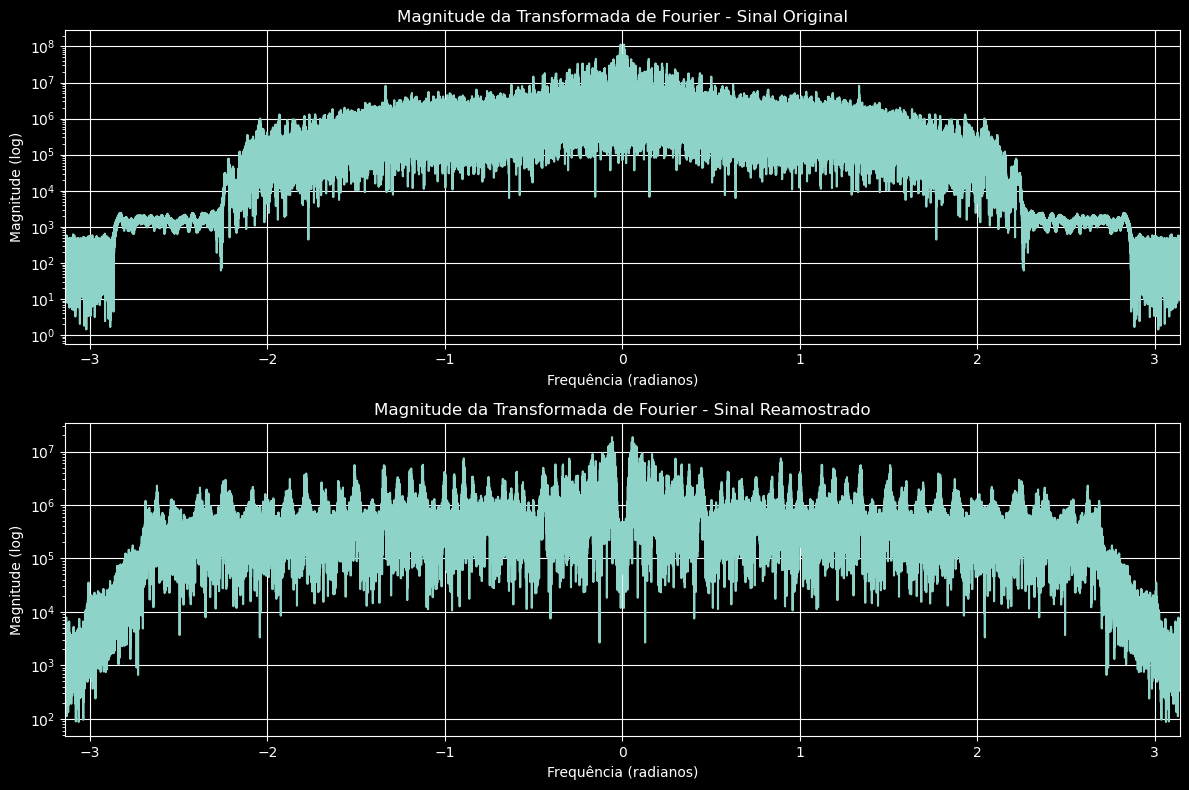

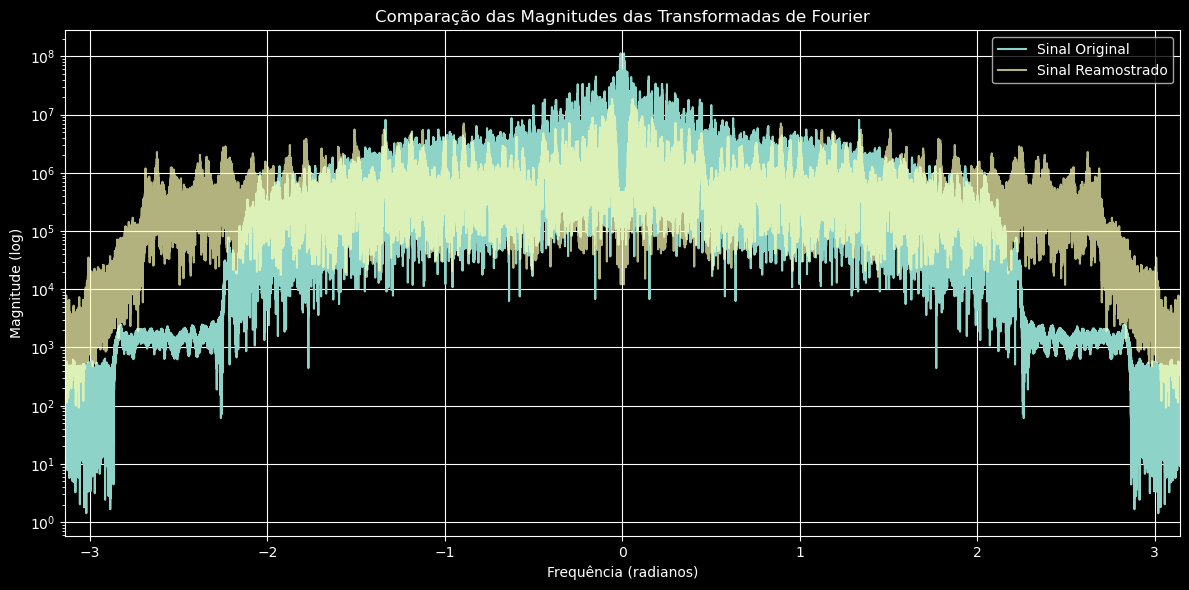

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy import signal
import os
from IPython.display import Audio
plt.style.use('dark_background')

def get_audio_file():
    """
    Função para obter arquivo de áudio WAV:
    - Se estiver rodando localmente: usa tkinter para selecionar arquivo
    - Se estiver no Colab: usa o uploader de arquivos do Google Colab
    
    Returns:
        str: Caminho para o arquivo de áudio selecionado
    """
    # Verifica se está rodando no Google Colab
    try:
        from google.colab import files
        print("Detectado ambiente Google Colab")
        print("Por favor, faça upload do arquivo de áudio WAV:")
        uploaded = files.upload()
        
        if not uploaded:
            raise ValueError("Nenhum arquivo foi enviado")
            
        # Retorna o primeiro arquivo carregado
        filename = list(uploaded.keys())[0]
        print(f"Arquivo carregado: {filename}")
        return filename
        
    except ImportError:
        # Se não estiver no Colab, estamos em ambiente local - usar tkinter
        import tkinter as tk
        from tkinter import filedialog
        
        print("Detectado ambiente local")
        
        # Cria uma instância Tk que ficará visível
        root = tk.Tk()
        root.attributes('-topmost', True)  # Coloca janela no topo
        root.focus_force()  # Força o foco na janela
        
        # Minimiza a janela principal para que só apareça o diálogo
        root.geometry('300x100')  # Tamanho pequeno
        root.title("Seleção de Arquivo de Áudio")
        
        # Informa ao usuário o que está acontecendo
        label = tk.Label(root, text="Clique no botão para selecionar um arquivo WAV")
        label.pack(padx=10, pady=10)
        
        file_path = [None]  # Usar uma lista para armazenar o resultado
        
        def select_file():
            selected_file = filedialog.askopenfilename(
                title="Selecione o arquivo de áudio",
                filetypes=[("Arquivos WAV", "*.wav"), ("Todos os arquivos", "*.*")]
            )
            if selected_file:
                file_path[0] = selected_file
                root.destroy()
        
        button = tk.Button(root, text="Selecionar Arquivo", command=select_file)
        button.pack(pady=10)
        
        # Centraliza a janela na tela
        root.eval('tk::PlaceWindow . center')
        
        # Espera até que o usuário faça a seleção
        root.mainloop()
        
        if not file_path[0]:
            # Se o usuário fechou a janela sem selecionar
            print("Nenhum arquivo selecionado. Usando arquivo padrão.")
            # Tente usar um arquivo padrão na pasta atual
            default_files = [f for f in os.listdir() if f.endswith('.wav')]
            if default_files:
                file_path[0] = default_files[0]
                print(f"Usando arquivo: {file_path[0]}")
            else:
                raise ValueError("Nenhum arquivo foi selecionado e não há arquivos WAV padrão")
        
        print(f"Arquivo selecionado: {file_path[0]}")
        return file_path[0]
    
file_path=get_audio_file()

# Leitura do arquivo de áudio
fs_original, audio_data = wavfile.read(file_path)

# Se o áudio for estéreo, vamos pegar apenas um canal
if len(audio_data.shape) > 1:
    audio_data = audio_data[:, 0]

# 1. Imprimindo frequência de amostragem e comprimento do sinal original
print(f"Sinal Original:")
print(f"Frequência de amostragem: {fs_original} Hz")
print(f"Comprimento do sinal: {len(audio_data)} amostras")
print(f"Duração: {len(audio_data)/fs_original:.2f} segundos")

# Reproduzir o áudio original
display(Audio(audio_data, rate=fs_original))

# Calcular o fator de decimação para obter frequência próxima a 8 kHz
decimate_factor = int(np.round(fs_original / 8000))
fs_new = fs_original / decimate_factor

# 2. Utilizar a função decimate para reduzir a frequência de amostragem
audio_decimated = signal.decimate(audio_data, decimate_factor)

# 3. Imprimindo frequência de amostragem e comprimento do sinal reamostrado
print(f"\nSinal Reamostrado:")
print(f"Frequência de amostragem: {fs_new:.1f} Hz")
print(f"Comprimento do sinal: {len(audio_decimated)} amostras")
print(f"Duração: {len(audio_decimated)/fs_new:.2f} segundos")

# Reproduzir o áudio reamostrado
display(Audio(audio_decimated, rate=int(fs_new)))

# 4. Calcular e comparar as transformadas de Fourier
# Calculando FFT do sinal original
N_original = len(audio_data)
fft_original = np.fft.fftshift(np.fft.fft(audio_data))
freq_original = np.linspace(-np.pi, np.pi, N_original)

# Calculando FFT do sinal decimado
N_decimated = len(audio_decimated)
fft_decimated = np.fft.fftshift(np.fft.fft(audio_decimated))
freq_decimated = np.linspace(-np.pi, np.pi, N_decimated)

# Plotando as magnitudes das transformadas
plt.figure(figsize=(12, 8))

# Subplot para o sinal original
plt.subplot(2, 1, 1)
plt.title('Magnitude da Transformada de Fourier - Sinal Original')
plt.semilogy(freq_original, np.abs(fft_original))
plt.grid(True)
plt.xlabel('Frequência (radianos)')
plt.ylabel('Magnitude (log)')
plt.xlim(-np.pi, np.pi)

# Subplot para o sinal decimado
plt.subplot(2, 1, 2)
plt.title('Magnitude da Transformada de Fourier - Sinal Reamostrado')
plt.semilogy(freq_decimated, np.abs(fft_decimated))
plt.grid(True)
plt.xlabel('Frequência (radianos)')
plt.ylabel('Magnitude (log)')
plt.xlim(-np.pi, np.pi)

plt.tight_layout()
plt.show()

# Comparação direta em um único gráfico
plt.figure(figsize=(12, 6))
plt.title('Comparação das Magnitudes das Transformadas de Fourier')

# Normalizar os comprimentos para comparação
# Usando interpolação para o sinal decimado
x_normalized = np.linspace(-np.pi, np.pi, N_original)
y_decimated_normalized = np.interp(
    x_normalized, 
    freq_decimated, 
    np.abs(fft_decimated)
)

plt.semilogy(freq_original, np.abs(fft_original), label='Sinal Original')
plt.semilogy(x_normalized, y_decimated_normalized, label='Sinal Reamostrado', alpha=0.7)
plt.grid(True)
plt.xlabel('Frequência (radianos)')
plt.ylabel('Magnitude (log)')
plt.xlim(-np.pi, np.pi)
plt.legend()
plt.tight_layout()
plt.show()

## $II$. *Upsampling*

Informações de comparação:

Sinal Original:
Frequência de amostragem: 44100 Hz
Comprimento do sinal: 441263 amostras
Duração: 10.01 segundos

Sinal após Upsampling:
Frequência de amostragem: 44100 Hz
Comprimento do sinal: 441263 amostras
Duração: 10.01 segundos


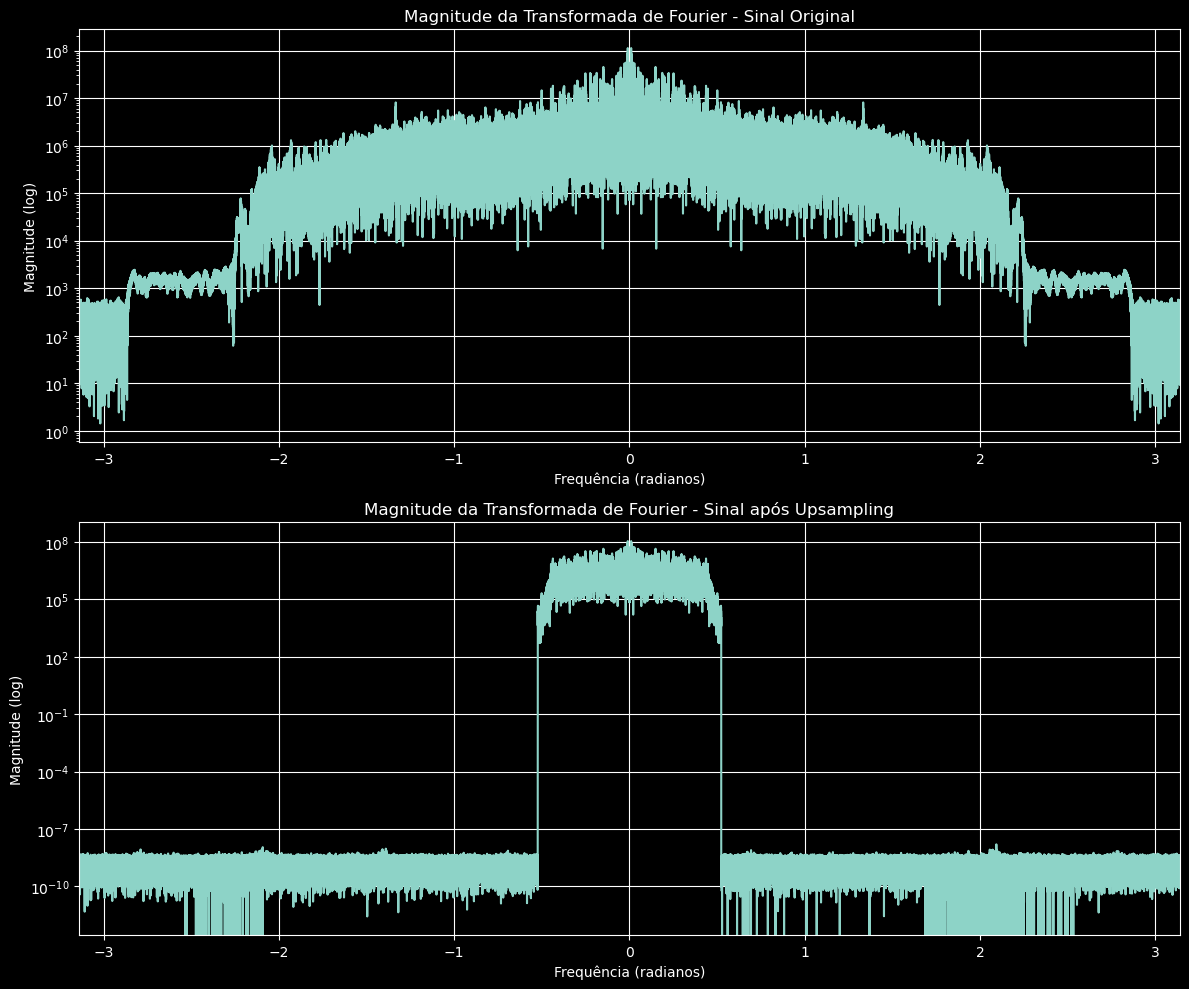

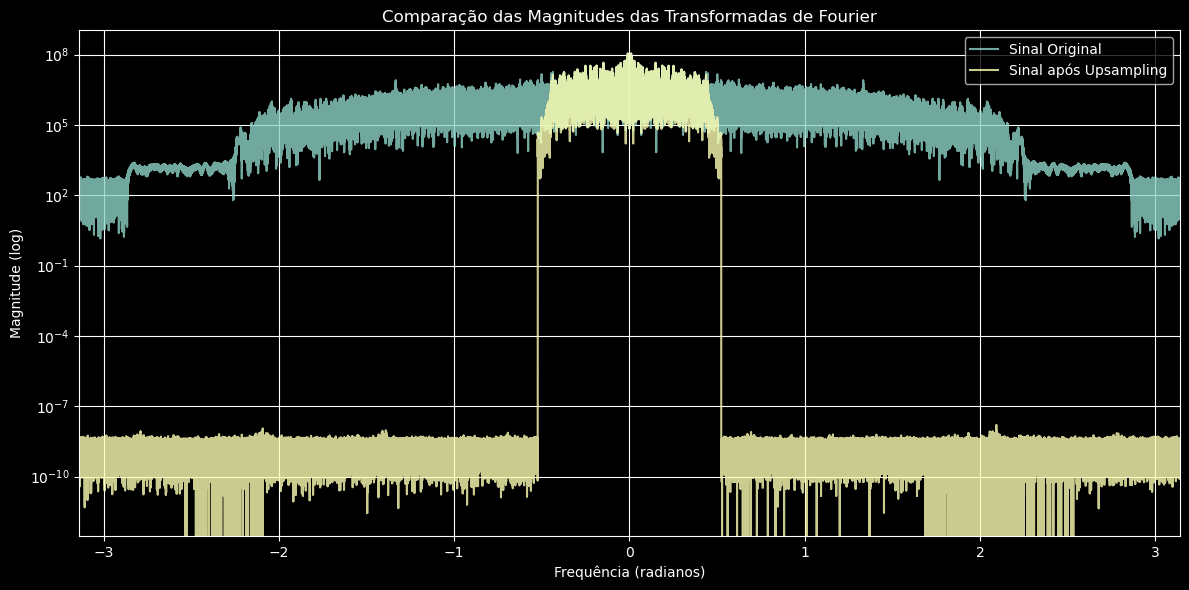

In [2]:
# Parte II - Upsampling do sinal decimado de volta para a frequência original

# 1. Upsampling do sinal decimado (obtido na Parte I) para a frequência original
target_length = len(audio_data)  # Comprimento do sinal original
audio_upsampled = signal.resample(audio_decimated, target_length)

# 2 & 3. Imprimir informações dos sinais
print("Informações de comparação:")
print("\nSinal Original:")
print(f"Frequência de amostragem: {fs_original} Hz")
print(f"Comprimento do sinal: {len(audio_data)} amostras")
print(f"Duração: {len(audio_data)/fs_original:.2f} segundos")

print("\nSinal após Upsampling:")
print(f"Frequência de amostragem: {fs_original} Hz")
print(f"Comprimento do sinal: {len(audio_upsampled)} amostras")
print(f"Duração: {len(audio_upsampled)/fs_original:.2f} segundos")

# Reproduzir o áudio upsampled
display(Audio(audio_upsampled, rate=fs_original))

# 4. Calcular e comparar as transformadas de Fourier
# Calculando FFT do sinal original
N_original = len(audio_data)
fft_original = np.fft.fftshift(np.fft.fft(audio_data))
freq_original = np.linspace(-np.pi, np.pi, N_original)

# Calculando FFT do sinal upsampled
N_upsampled = len(audio_upsampled)
fft_upsampled = np.fft.fftshift(np.fft.fft(audio_upsampled))
freq_upsampled = np.linspace(-np.pi, np.pi, N_upsampled)

# Plotando as magnitudes das transformadas
plt.figure(figsize=(12, 10))

# Subplot para o sinal original
plt.subplot(2, 1, 1)
plt.title('Magnitude da Transformada de Fourier - Sinal Original')
plt.semilogy(freq_original, np.abs(fft_original))
plt.grid(True)
plt.xlabel('Frequência (radianos)')
plt.ylabel('Magnitude (log)')
plt.xlim(-np.pi, np.pi)

# Subplot para o sinal upsampled
plt.subplot(2, 1, 2)
plt.title('Magnitude da Transformada de Fourier - Sinal após Upsampling')
plt.semilogy(freq_upsampled, np.abs(fft_upsampled))
plt.grid(True)
plt.xlabel('Frequência (radianos)')
plt.ylabel('Magnitude (log)')
plt.xlim(-np.pi, np.pi)

plt.tight_layout()
plt.show()

# Comparação direta em um único gráfico
plt.figure(figsize=(12, 6))
plt.title('Comparação das Magnitudes das Transformadas de Fourier')
plt.semilogy(freq_original, np.abs(fft_original), label='Sinal Original', alpha=0.8)
plt.semilogy(freq_upsampled, np.abs(fft_upsampled), label='Sinal após Upsampling', alpha=0.8)
plt.grid(True)
plt.xlabel('Frequência (radianos)')
plt.ylabel('Magnitude (log)')
plt.xlim(-np.pi, np.pi)
plt.legend()
plt.tight_layout()
plt.show()

## $III$. *MSE*

Áudio Original:


Áudio Reconstruído (após downsampling e upsampling):


Mean Squared Error (MSE): 1666401.943648


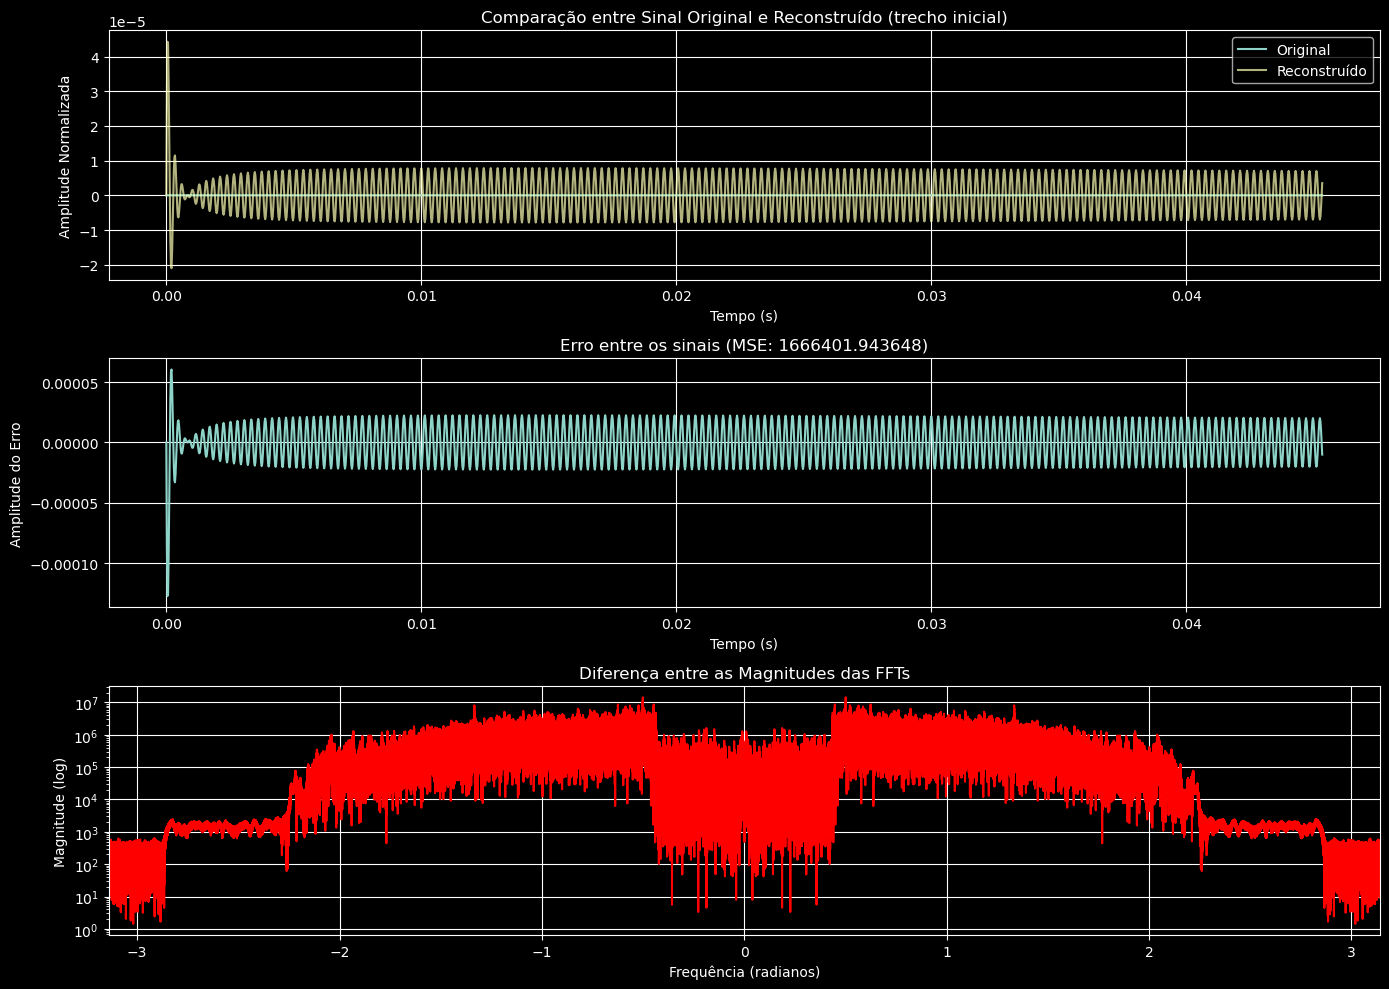

Coeficiente de correlação entre os sinais: 0.942958
Relação Sinal-Ruído (SNR): -38.51 dB


In [3]:
# Parte III - Análise comparativa e cálculo do MSE

# 1. Escutar o áudio original e o áudio reconstruído
print("Áudio Original:")
display(Audio(audio_data, rate=fs_original))

print("Áudio Reconstruído (após downsampling e upsampling):")
display(Audio(audio_upsampled, rate=fs_original))

# 2. Cálculo do MSE entre o sinal original e o reconstruído
error = audio_data - audio_upsampled
mse = np.mean(error**2)

print(f"Mean Squared Error (MSE): {mse:.6f}")

# Normalização dos sinais para visualização da diferença
audio_data_norm = audio_data / np.max(np.abs(audio_data))
audio_upsampled_norm = audio_upsampled / np.max(np.abs(audio_upsampled))

# 3. Visualização para comparação
# Gráfico de erro no domínio do tempo (para um trecho do sinal)
plt.figure(figsize=(14, 10))

# Mostrar apenas um trecho para melhor visualização
segment_length = min(2000, len(audio_data))  # 2000 amostras ou menos
time_axis = np.arange(segment_length) / fs_original

plt.subplot(3, 1, 1)
plt.plot(time_axis, audio_data_norm[:segment_length], label='Original')
plt.plot(time_axis, audio_upsampled_norm[:segment_length], label='Reconstruído', alpha=0.7)
plt.grid(True)
plt.legend()
plt.title('Comparação entre Sinal Original e Reconstruído (trecho inicial)')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude Normalizada')

# Erro no tempo
plt.subplot(3, 1, 2)
error_norm = error[:segment_length] / np.max(np.abs(error))
plt.plot(time_axis, error_norm)
plt.grid(True)
plt.title(f'Erro entre os sinais (MSE: {mse:.6f})')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude do Erro')

# Espectrogramas para comparação das características espectrais
plt.subplot(3, 1, 3)
# Diferença entre as FFTs
fft_diff = np.abs(fft_original) - np.abs(fft_upsampled)
plt.semilogy(freq_original, np.abs(fft_diff), label='Diferença', color='r')
plt.grid(True)
plt.title('Diferença entre as Magnitudes das FFTs')
plt.xlabel('Frequência (radianos)')
plt.ylabel('Magnitude (log)')
plt.xlim(-np.pi, np.pi)

plt.tight_layout()
plt.show()

# Análise de correlação entre os sinais
correlation = np.corrcoef(audio_data, audio_upsampled)[0, 1]
print(f"Coeficiente de correlação entre os sinais: {correlation:.6f}")

# Análise adicional: Relação sinal-ruído (SNR)
# O "ruído" aqui é considerado como a diferença entre o sinal original e o reconstruído
signal_power = np.mean(audio_data**2)
noise_power = np.mean(error**2)  # Já calculamos isso como MSE
snr = 10 * np.log10(signal_power / noise_power) if noise_power > 0 else float('inf')

print(f"Relação Sinal-Ruído (SNR): {snr:.2f} dB")